In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("Voshod.csv")
parameters = ["Time", "Velocity", "Acceleration", "Mass", "AltitudeFromSea"]
for col in data.columns:
    if col not in parameters:
        data.drop(col, axis=1, inplace=True)
data.head()

,Time,Velocity,Acceleration,Mass,AltitudeFromSea
0,1,6,10.80,64.89,72.43
1,2,16,10.95,64.34,72.43
2,3,28,11.08,63.85,72.43
3,4,38,11.21,63.38,72.43
4,5,50,11.37,62.89,72.43


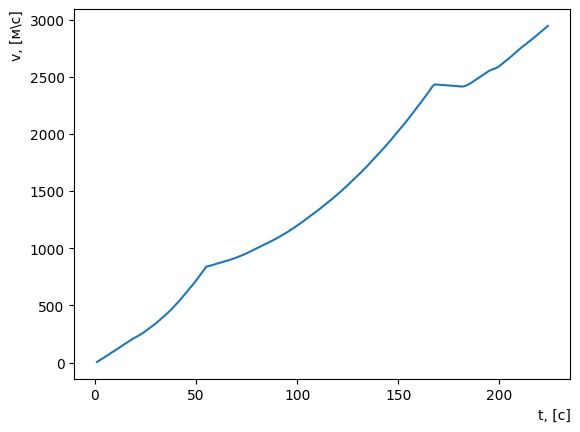

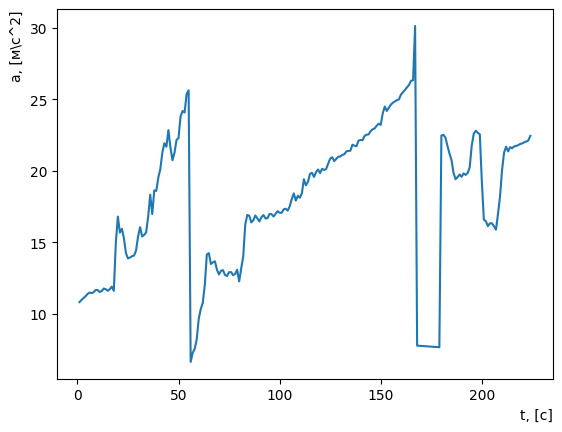

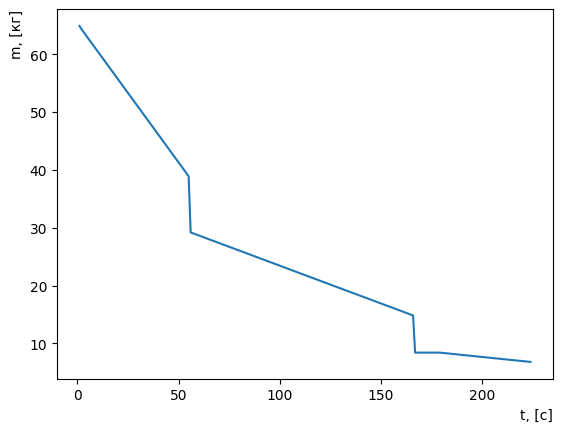

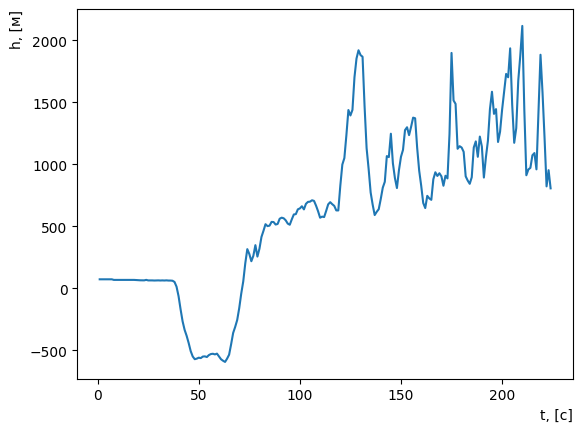

In [ ]:
plt.plot(data["Time"], data["Velocity"])
plt.xlabel("t, [c]", loc="right")
plt.ylabel(r"v, [м\с]", loc="top")
plt.show()

print()

plt.plot(data["Time"], data["Acceleration"])
plt.xlabel("t, [c]", loc="right")
plt.ylabel(r"a, [м\с^2]", loc="top")
plt.show()

print()

plt.plot(data["Time"], data["Mass"])
plt.xlabel("t, [c]", loc="right")
plt.ylabel("m, [кг]", loc="top")
plt.show()

print()

plt.plot(data["Time"], data["AltitudeFromSea"])
plt.xlabel("t, [c]", loc="right")
plt.ylabel("h, [м]", loc="top")
plt.show()

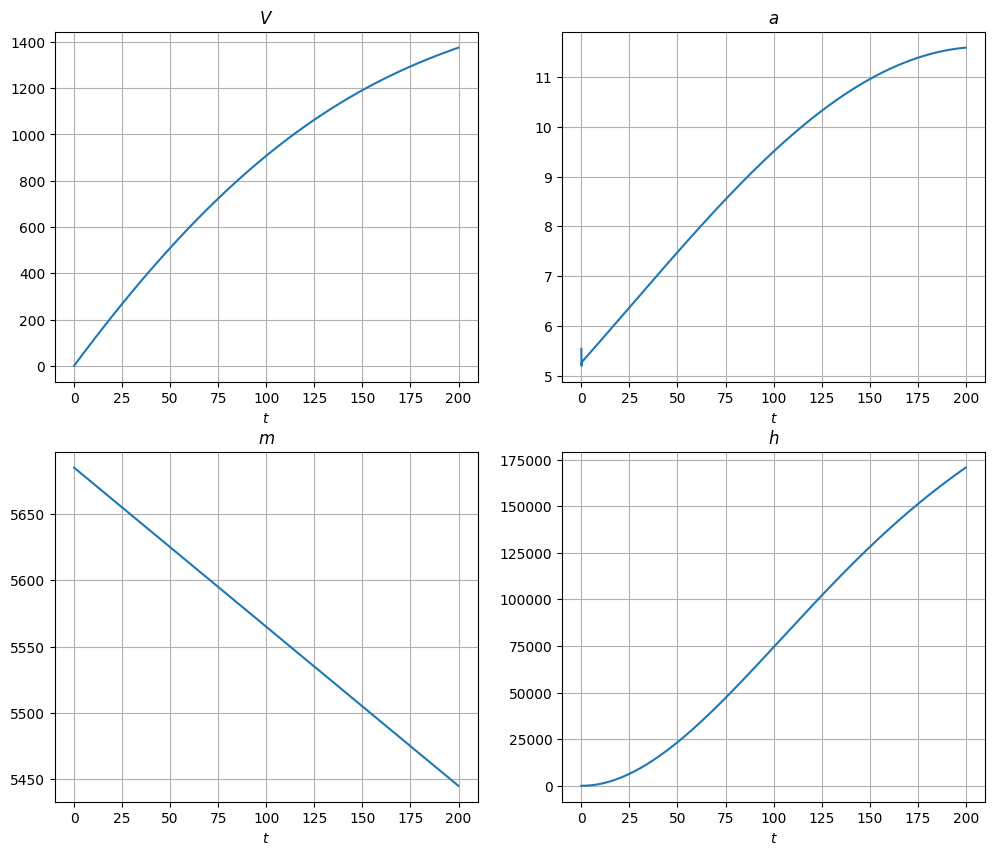

In [ ]:
import math

import matplotlib.pyplot as plt
import numpy as np

s = 20
c = 0.045
p = 1.29
p0 = 1.29
m = 5685
kT = 414 * (10**-23)
b = 0.45
GM = 39.85992 * (10**13)
R = 6400000
F = m * 5.54
g = 9.8
q = 1.2
V = 0
h = 0
a = 5.54
eps = 1
alfa = 0
pi = math.pi

t = np.arange(0.0, 200, 0.1)
dots_count = len(t)
all_Vy = [0] * dots_count
all_Vx = [0] * dots_count
all_V = [0] * dots_count
all_m = [m] + ([0] * (dots_count - 1))
all_a = [a] + ([0] * (dots_count - 1))
all_h = [0] * dots_count

for dot in t[1:]:
    i = int(dot * 10)
    alfa_rad = alfa * pi / 180
    a_x = (F * math.cos(alfa_rad) - 0.5 * c * p * s * (V**2) * math.cos(alfa_rad)) / m
    a_y = (
        F * math.sin(alfa_rad) - 0.5 * c * p * s * (V**2) * math.sin(alfa_rad) - m * g
    ) / m
    alfa = b * dot
    p = p0 * math.exp(-m * g * h / kT)
    F += eps * 0.1
    m -= q * 0.1
    g = GM / (R + h) ** 2
    h = (all_V[i - 1] ** 2) / (2 * a)
    all_Vy[i] = all_Vy[i - 1] + a_y * 0.1
    all_Vx[i] = all_Vx[i - 1] + a_x * 0.1
    all_V[i] = (all_Vy[i] ** 2 + all_Vx[i] ** 2) ** 0.5
    all_m[i] = m
    all_a[i] = a_y + 15
    all_h[i] = h

plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.xlabel(r"$t$")
plt.title(r"$V$")
plt.plot(t, all_V)
plt.grid(True)

plt.subplot(222)
plt.xlabel(r"$t$")
plt.title(r"$a$")
plt.plot(t, all_a)
plt.grid(True)

plt.subplot(223)
plt.xlabel(r"$t$")
plt.title(r"$m$")
plt.plot(t, all_m)
plt.grid(True)

plt.subplot(224)
plt.xlabel(r"$t$")
plt.title(r"$h$")
plt.plot(t, all_h)
plt.grid(True)

plt.show()

In [ ]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv("data.csv")
parameters = [
    "Time",
    "Velocity",
    "GForce",
    "Acceleration",
    "Thrust",
    "TWR",
    "Mass",
    "AltitudeFromTerrain",
    "AltitudeFromSea",
    "DownrangeDistance",
    "Latitude",
    "Longitude",
    "Apoapsis",
    "Periapsis",
    "Inclination",
    "OrbitalVelocity",
]
for col in data.columns:
    if col not in parameters:
        data.drop(col, axis=1, inplace=True)
data.head()

s = 20
c = 0.045
p = 1.29
p0 = 1.29
m = 5685
kT = 414 * (10**-23)
b = 0.45
GM = 39.85992 * (10**13)
R = 6400000
F = m * 5.54
g = 9.8
q = 1.2
V = 0
h = 0
a = 5.54
eps = 1
alfa = 0
pi = math.pi

t = np.arange(0.0, 200, 0.1)
dots_count = len(t)
all_Vy = [0] * dots_count
all_Vx = [0] * dots_count
all_V = [0] * dots_count
all_m = [m] + ([0] * (dots_count - 1))
all_a = [a] + ([0] * (dots_count - 1))
all_h = [0] * dots_count

for dot in t[1:]:
    i = int(dot * 10)
    alfa_rad = alfa * pi / 180
    a_x = (F * math.cos(alfa_rad) - 0.5 * c * p * s * (V**2) * math.cos(alfa_rad)) / m
    a_y = (
        F * math.sin(alfa_rad) - 0.5 * c * p * s * (V**2) * math.sin(alfa_rad) - m * g
    ) / m
    alfa = b * dot
    p = p0 * math.exp(-m * g * h / kT)
    F += eps * 0.1
    m -= q * 0.1
    g = GM / (R + h) ** 2
    h = (all_V[i - 1] ** 2) / (2 * a)
    all_Vy[i] = all_Vy[i - 1] + a_y * 0.1
    all_Vx[i] = all_Vx[i - 1] + a_x * 0.1
    all_V[i] = (all_Vy[i] ** 2 + all_Vx[i] ** 2) ** 0.5
    all_m[i] = m
    all_a[i] = a_y + 15
    all_h[i] = h

plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.grid(True)
plt.xlabel(r"$t$")
plt.title(r"$V$")
plt.plot(t, all_V)
plt.plot(data["Time"], data["Velocity"])
plt.subplot(222)
plt.xlabel(r"$t$")
plt.title(r"$a$")
plt.plot(t, all_a)
plt.plot(data["Time"], data["Acceleration"])
plt.grid(True)

plt.subplot(223)
plt.xlabel(r"$t$")
plt.title(r"$m$")
plt.plot(t, all_m)
plt.plot(data["Time"], data["Mass"])
plt.grid(True)

plt.subplot(224)
plt.xlabel(r"$t$")
plt.title(r"$h$")
plt.plot(t, all_h)
plt.plot(data["Time"], list(map(lambda x: -1 * int(x) * 100, data["AltitudeFromSea"])))
plt.grid(True)

plt.show()

In [ ]:
import math

import matplotlib.pyplot as plt
# подключение необходимых библиотек
import numpy as np
import pandas as pd

# получение параметров полёта из KSP
data = pd.read_csv("data.csv")
parameters = [
    "Time",
    "Velocity",
    "GForce",
    "Acceleration",
    "Thrust",
    "TWR",
    "Mass",
    "AltitudeFromTerrain",
    "AltitudeFromSea",
    "DownrangeDistance",
    "Latitude",
    "Longitude",
    "Apoapsis",
    "Periapsis",
    "Inclination",
    "OrbitalVelocity",
]
for col in data.columns:
    if col not in parameters:
        data.drop(col, axis=1, inplace=True)
data.head()

# задаём необходимые константы
s = 20
c = 0.045
p = 1.29
p0 = 1.29
m = 5685
kT = 414 * (10**-23)
b = 0.45
GM = 39.85992 * (10**13)
R = 6400000
F = m * 5.54
g = 9.8
q = 1.2
V = 0
h = 0
a = 5.54
eps = 1
alfa = 0
pi = math.pi

# реализация математической модели
t = np.arange(0.0, 200, 0.1)
dots_count = len(t)
all_Vy = [0] * dots_count
all_Vx = [0] * dots_count
all_V = [0] * dots_count
all_m = [m] + ([0] * (dots_count - 1))
all_a = [a] + ([0] * (dots_count - 1))
all_h = [0] * dots_count

for dot in t[1:]:
    i = int(dot * 10)
    alfa_rad = alfa * pi / 180
    a_x = (F * math.cos(alfa_rad) - 0.5 * c * p * s * (V**2) * math.cos(alfa_rad)) / m
    a_y = (
        F * math.sin(alfa_rad) - 0.5 * c * p * s * (V**2) * math.sin(alfa_rad) - m * g
    ) / m
    alfa = b * dot
    p = p0 * math.exp(-m * g * h / kT)
    F += eps * 0.1
    m -= q * 0.1
    g = GM / (R + h) ** 2
    h = (all_V[i - 1] ** 2) / (2 * a)
    all_Vy[i] = all_Vy[i - 1] + a_y * 0.1
    all_Vx[i] = all_Vx[i - 1] + a_x * 0.1
    all_V[i] = (all_Vy[i] ** 2 + all_Vx[i] ** 2) ** 0.5
    all_m[i] = m
    all_a[i] = a_y + 15
    all_h[i] = h

# построение графиков
plt.figure(figsize=(12, 10))

plt.subplot(221)
plt.grid(True)
plt.xlabel(r"$t$")
plt.title(r"$V$")
plt.plot(t, all_V)
plt.plot(data["Time"], data["Velocity"])
plt.subplot(222)
plt.xlabel(r"$t$")
plt.title(r"$a$")
plt.plot(t, all_a)
plt.plot(data["Time"], data["Acceleration"])
plt.grid(True)

plt.subplot(223)
plt.xlabel(r"$t$")
plt.title(r"$m$")
plt.plot(t, all_m)
plt.plot(data["Time"], data["Mass"])
plt.grid(True)

plt.subplot(224)
plt.xlabel(r"$t$")
plt.title(r"$h$")
plt.plot(t, all_h)
plt.plot(data["Time"], list(map(lambda x: -1 * int(x) * 100, data["AltitudeFromSea"])))
plt.grid(True)

plt.show()